In [1]:
import matplotlib.pyplot as plt
from PAMI.partialPeriodicFrequentPattern.basic.GPFgrowth import GPFgrowth
from PAMI.partialPeriodicFrequentPattern.basic.PPF_DFS import PPF_DFS
from algs.cuPPFPMiner import cuPPFPMiner
import re
import subprocess


def run_and_capture(command):
    # Run the external command
    command = " ".join(command)
    print("Running command: ", command)
    
    result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, shell=True, universal_newlines=True)
    
    # result.stdout will contain the output lines
    output = result.stdout
    print(output)

    patterns_found = None
    time_taken = None

    # Regex to capture number of patterns and time taken
    patterns_match = re.search(r"Number of patterns found:\s+(\d+)", output)
    time_match = re.search(r"Time taken:\s+([\d\.]+)\s+s", output)

    if patterns_match:
        patterns_found = int(patterns_match.group(1))
    if time_match:
        time_taken = float(time_match.group(1))

    return patterns_found, time_taken

raw_sep = r"\t"
sep = "\t"
output_file = "/dev/null"

In [2]:
file = "/home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv"

minSup = 5
maxPer = 5000
per_ratio = [1, 0.9999, 0.9997, 0.9995]

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []

In [3]:
for rat in per_ratio:
    miner = cuPPFPMiner(file, minSup, maxPer, rat, sep, output_file, 'managed')
    miner.mine()
    cuPPFP_native_runtime.append(miner.getRuntime())
    cuPPFP_native_pattens.append(len(miner.getPatterns()))
    

    # miner = PPF_DFS(file, minSup,
    patterns, time = run_and_capture(["./algs/ppf_dfs", file, str(minSup), str(maxPer), str(rat), raw_sep, output_file, "8"])
    PPF_DFS_runtime.append(time)
    PPF_DFS_pattens.append(patterns)

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 1 \t /dev/null 8
Number of patterns found: 27989
Time taken: 9.00928 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9999 \t /dev/null 8
Number of patterns found: 27989
Time taken: 9.53136 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9997 \t /dev/null 8
Number of patterns found: 27990
Time taken: 9.24572 s

Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_T10I4D100K.csv 5 5000 0.9995 \t /dev/null 8
Number of patterns found: 27991
Time taken: 8.87874 s



In [4]:
print("cuPPFP_native_runtime", cuPPFP_native_runtime)
print("cuPPFP_native_pattens", cuPPFP_native_pattens)

print("PPF_DFS_runtime", PPF_DFS_runtime)
print("PPF_DFS_pattens", PPF_DFS_pattens)

cuPPFP_native_runtime [11.156925916671753, 11.442636728286743, 11.495154619216919, 11.989448547363281]
cuPPFP_native_pattens [27989, 27989, 27990, 27991]
PPF_DFS_runtime [9.00928, 9.53136, 9.24572, 8.87874]
PPF_DFS_pattens [27989, 27989, 27990, 27991]


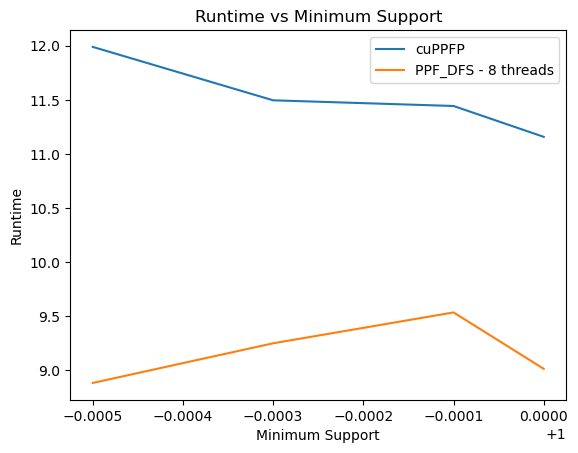

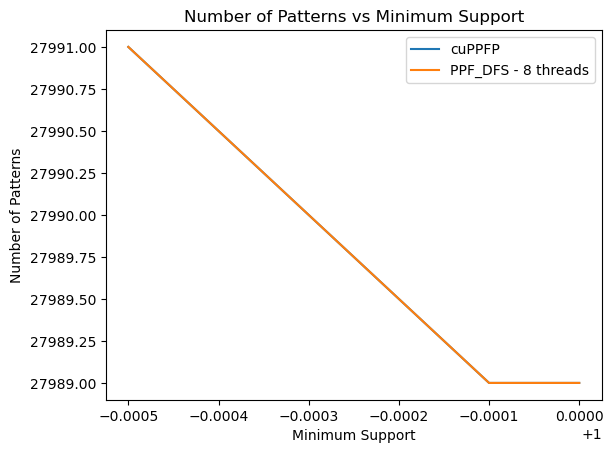

<Figure size 640x480 with 0 Axes>

In [5]:
plt.plot(per_ratio, cuPPFP_native_runtime)
# plt.plot(per_ratio, GPFgrowth_runtime)
plt.plot(per_ratio, PPF_DFS_runtime)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Runtime')
plt.title('Runtime vs Minimum Support')
plt.show()

# filename is input file + minSup + maxPer + per_ratio
plt.savefig(f"runtime_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

plt.plot(per_ratio, cuPPFP_native_pattens)
# plt.plot(per_ratio, GPFgrowth_pattens)
plt.plot(per_ratio, PPF_DFS_pattens)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Number of Patterns')
plt.title('Number of Patterns vs Minimum Support')
plt.show()

plt.savefig(f"patterns_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)


In [6]:
file = "/home/tarun/cuPAMI/datasets/Temporal_kosarak.csv"
minSup = 1500
maxPer = 5000
per_ratio = [1,0.999, 0.998, 0.997, 0.996]
sep = "\t"

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []


for rat in per_ratio:
    # miner = cuPPFPMiner(file, i, maxPer, per_ratio, sep, output_file, 'managed')
    miner = cuPPFPMiner(file, minSup, maxPer, rat, sep, output_file, 'managed')
    miner.mine()
    print("Time taken: ", miner.getRuntime(), "Number of patterns: ", len(miner.getPatterns()))
    cuPPFP_native_runtime.append(miner.getRuntime())
    cuPPFP_native_pattens.append(len(miner.getPatterns()))

    patterns, time = run_and_capture(["./algs/ppf_dfs", file, str(minSup), str(maxPer), str(rat), raw_sep, output_file, "8"])
    PPF_DFS_runtime.append(time)
    PPF_DFS_pattens.append(patterns)
    

Time taken:  2.2385103702545166 Number of patterns:  155654
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 1 \t /dev/null 8
Number of patterns found: 155655
Time taken: 75.6873 s

Time taken:  2.0941667556762695 Number of patterns:  192790
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.999 \t /dev/null 8
Number of patterns found: 192791
Time taken: 71.6596 s

Time taken:  2.2612056732177734 Number of patterns:  218799
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.998 \t /dev/null 8
Number of patterns found: 218800
Time taken: 76.5765 s

Time taken:  2.379946708679199 Number of patterns:  218811
Running command:  ./algs/ppf_dfs /home/tarun/cuPAMI/datasets/Temporal_kosarak.csv 1500 5000 0.997 \t /dev/null 8
Number of patterns found: 218811
Time taken: 72.7642 s

Time taken:  2.1321895122528076 Number of patterns:  218815
Running command:  ./algs/ppf_

In [8]:
print("cuPPFP_native_runtime", cuPPFP_native_runtime)
print("cuPPFP_native_pattens", cuPPFP_native_pattens)

print("PPF_DFS_runtime", PPF_DFS_runtime)
print("PPF_DFS_pattens", PPF_DFS_pattens)

cuPPFP_native_runtime [2.2385103702545166, 2.0941667556762695, 2.2612056732177734, 2.379946708679199, 2.1321895122528076]
cuPPFP_native_pattens [155654, 192790, 218799, 218811, 218815]
PPF_DFS_runtime [75.6873, 71.6596, 76.5765, 72.7642, 73.6598]
PPF_DFS_pattens [155655, 192791, 218800, 218811, 218815]


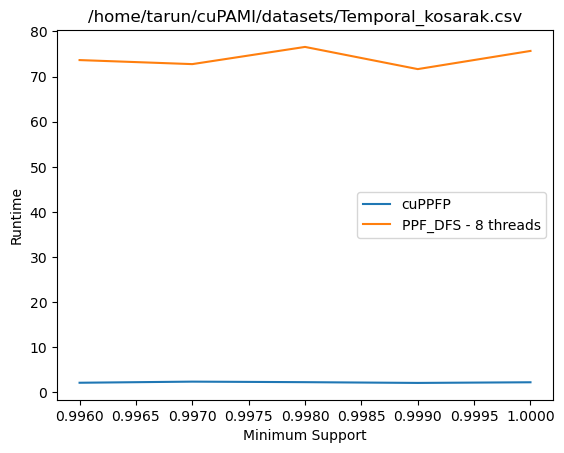

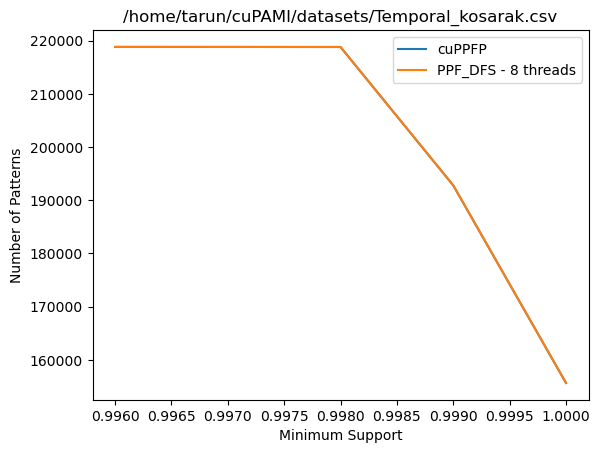

<Figure size 640x480 with 0 Axes>

In [9]:
plt.plot(per_ratio, cuPPFP_native_runtime)
plt.plot(per_ratio, PPF_DFS_runtime)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Runtime')
plt.title(file)
plt.show()

plt.savefig(f"runtime_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

# plt.plot(minSup, cuPPFP_native_pattens)
# plt.plot(minSup, PPF_DFS_pattens)
plt.plot(per_ratio, cuPPFP_native_pattens)
plt.plot(per_ratio, PPF_DFS_pattens)
plt.legend(['cuPPFP', 'PPF_DFS - 8 threads'])
plt.xlabel('Minimum Support')
plt.ylabel('Number of Patterns')
plt.title(file)
plt.show()

plt.savefig(f"patterns_{file.split('/')[-1]}_{minSup}_{maxPer}_{per_ratio}.svg", transparent=True)

In [ ]:
file = "/home/tarun/cuPAMI/datasets/Temporal_kosarak.csv"
minSup = [900,875,850,825]
maxPer = 5000
per_ratio = 0.1
sep = "\t"

cuPPFP_native_runtime = []
cuPPFP_native_pattens = []

cuPPFP_custom_runtime = []
cuPPFP_custom_pattens = []

GPFgrowth_runtime = []
GPFgrowth_pattens = []

PPF_DFS_runtime = []
PPF_DFS_pattens = []




Time to read file:  0.15630793571472168
Time to read file:  0.11994242668151855
Time to read file:  0.1295456886291504
Time to read file:  0.11879301071166992
Time to read file:  0.11882138252258301
Time to read file:  0.1409142017364502
Time to read file:  0.1253798007965088
Time to read file:  0.11950445175170898


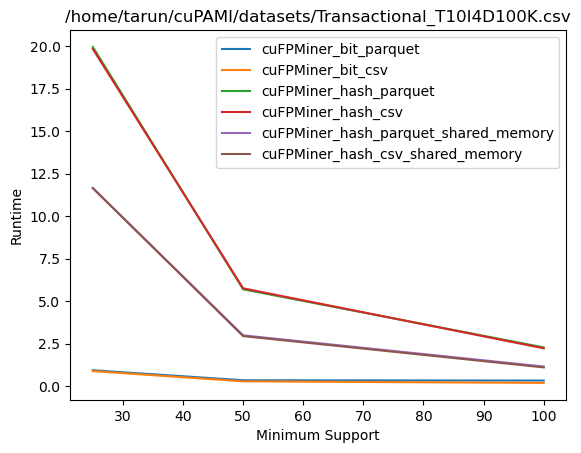

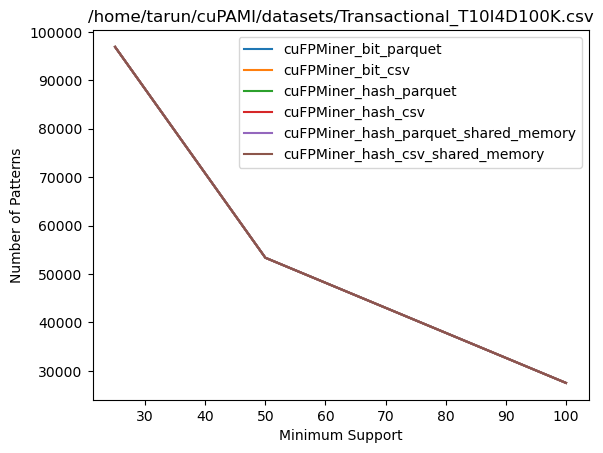

In [1]:
from algs.cuFPMiner_bit import cuFPMiner_bit
from algs.cuFPMiner_hash import cuFPMiner_hash
from algs.csv_to_parquet import csv_to_parquet
from matplotlib import pyplot as plt


work = [
    	# ["/home/tarun/cuPAMI/datasets/Transactional_BMS_POS.csv", [100, 50, 25, 10]],
        # ["/home/tarun/cuPAMI/datasets/Transactional_retail.csv", [100, 50, 25, 10]],
        # ["/home/tarun/cuPAMI/datasets/Transactional_kosarak.csv", [100, 50, 25, 10]],
        ["/home/tarun/cuPAMI/datasets/Transactional_T10I4D100K.csv", [100, 50, 25]],
        # ["/home/tarun/cuPAMI/datasets/Transactional_pumsb.csv", [100, 50, 25, 10]]
        ]
sep = "\t"


for file, minSup in work:
    cuFPMiner_bit_parquet_runtime = []
    cuFPMiner_bit_csv_runtime = []
    
    cuFPMiner_hash_parquet_runtime = []
    cuFPMiner_hash_csv_runtime = [] 
    
    cuFPMiner_hash_csv_shared_memory_runtime = []
    cuFPMiner_hash_parquet_shared_memory_runtime = []
    
    cuFPMiner_bit_parquet_patterns = []
    cuFPMiner_bit_csv_patterns = []
    
    cuFPMiner_hash_parquet_patterns = []
    cuFPMiner_hash_csv_patterns = []
    
    cuFPMiner_hash_parquet_shared_memory_patterns = []
    cuFPMiner_hash_csv_shared_memory_patterns = []
    
    # convert to parquet
    parquet_file = file.split("/")[-1].split(".")[0] + ".parquet"
    parquet_file = "/home/tarun/cuPAMI/datasets/" + parquet_file

    for i in minSup:
        miner = cuFPMiner_bit(parquet_file, i, sep, "parquet", 'managed')
        miner.mine()
        cuFPMiner_bit_parquet_runtime.append(miner.getRuntime())
        cuFPMiner_bit_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_bit(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_bit_csv_runtime.append(miner.getRuntime())
        cuFPMiner_bit_csv_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed')
        miner.mine()
        cuFPMiner_hash_parquet_runtime.append(miner.getRuntime())
        cuFPMiner_hash_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_hash_csv_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_patterns.append(len(miner.getPatterns()))
        
        miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed', shared=True)
        miner.mine()
        cuFPMiner_hash_parquet_shared_memory_runtime.append(miner.getRuntime())
        cuFPMiner_hash_parquet_shared_memory_patterns.append(len(miner.getPatterns()))
        
        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed', shared=True)
        miner.mine()
        cuFPMiner_hash_csv_shared_memory_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_shared_memory_patterns.append(len(miner.getPatterns()))
        

    plt.plot(minSup, cuFPMiner_bit_parquet_runtime)
    plt.plot(minSup, cuFPMiner_bit_csv_runtime)
    plt.plot(minSup, cuFPMiner_hash_parquet_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_runtime)
    plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_runtime)
    
    plt.legend(['cuFPMiner_bit_parquet', 'cuFPMiner_bit_csv', 'cuFPMiner_hash_parquet', 'cuFPMiner_hash_csv', 'cuFPMiner_hash_parquet_shared_memory', 'cuFPMiner_hash_csv_shared_memory'])
    
    plt.xlabel('Minimum Support')
    plt.ylabel('Runtime')
    
    plt.title(file)
    plt.show()
    
    
    plt.plot(minSup, cuFPMiner_bit_parquet_patterns)
    plt.plot(minSup, cuFPMiner_bit_csv_patterns)
    plt.plot(minSup, cuFPMiner_hash_parquet_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_patterns)
    plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_patterns)
    
    plt.legend(['cuFPMiner_bit_parquet', 'cuFPMiner_bit_csv', 'cuFPMiner_hash_parquet', 'cuFPMiner_hash_csv', 'cuFPMiner_hash_parquet_shared_memory', 'cuFPMiner_hash_csv_shared_memory'])
    
    plt.xlabel('Minimum Support')
    plt.ylabel('Number of Patterns')
    
    plt.title(file)
    plt.show()




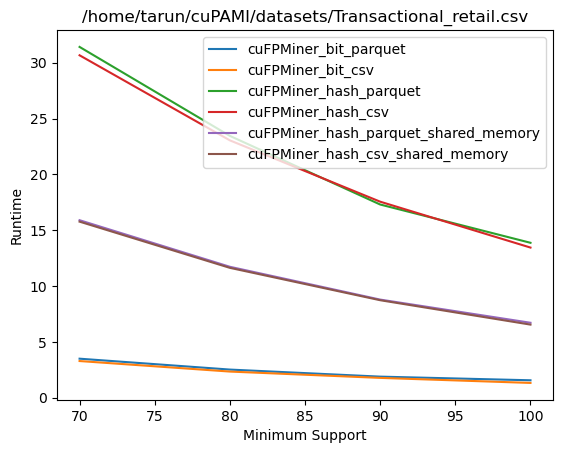

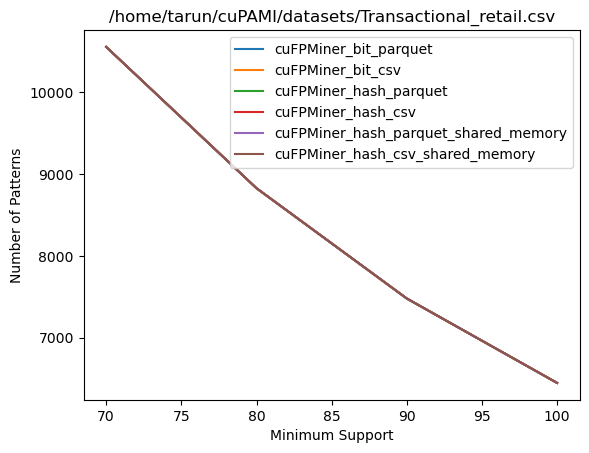

RuntimeError: Unable to open file: No such file or directory

In [2]:

work = [
        ["/home/tarun/cuPAMI/datasets/Transactional_retail.csv", [100, 90,80,70]],
        ["/home/tarun/cuPAMI/datasets/Transactional_kosarak.csv", [4000,3000,2000,1000]],
        ["/home/tarun/cuPAMI/datasets/Transactional_T10I4D100K.csv", [100, 50, 25]],
        ["/home/tarun/cuPAMI/datasets/Transactional_pumsb.csv", [40000, 39000, 38000, 37000]],
        ]
sep = "\t"


for file, minSup in work:
    cuFPMiner_bit_parquet_runtime = []
    cuFPMiner_bit_csv_runtime = []
    
    cuFPMiner_hash_parquet_runtime = []
    cuFPMiner_hash_csv_runtime = [] 
    
    cuFPMiner_hash_csv_shared_memory_runtime = []
    cuFPMiner_hash_parquet_shared_memory_runtime = []
    
    cuFPMiner_bit_parquet_patterns = []
    cuFPMiner_bit_csv_patterns = []
    
    cuFPMiner_hash_parquet_patterns = []
    cuFPMiner_hash_csv_patterns = []
    
    cuFPMiner_hash_parquet_shared_memory_patterns = []
    cuFPMiner_hash_csv_shared_memory_patterns = []
    
    # convert to parquet
    parquet_file = file.split("/")[-1].split(".")[0] + ".parquet"
    parquet_file = "/home/tarun/cuPAMI/datasets/" + parquet_file

    for i in minSup:
        miner = cuFPMiner_bit(parquet_file, i, sep, "parquet", 'managed')
        miner.mine()
        cuFPMiner_bit_parquet_runtime.append(miner.getRuntime())
        cuFPMiner_bit_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_bit(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_bit_csv_runtime.append(miner.getRuntime())
        cuFPMiner_bit_csv_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed')
        miner.mine()
        cuFPMiner_hash_parquet_runtime.append(miner.getRuntime())
        cuFPMiner_hash_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_hash_csv_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_patterns.append(len(miner.getPatterns()))
        
        miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed', shared=True)
        miner.mine()
        cuFPMiner_hash_parquet_shared_memory_runtime.append(miner.getRuntime())
        cuFPMiner_hash_parquet_shared_memory_patterns.append(len(miner.getPatterns()))
        
        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed', shared=True)
        miner.mine()
        cuFPMiner_hash_csv_shared_memory_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_shared_memory_patterns.append(len(miner.getPatterns()))
        

    plt.plot(minSup, cuFPMiner_bit_parquet_runtime)
    plt.plot(minSup, cuFPMiner_bit_csv_runtime)
    plt.plot(minSup, cuFPMiner_hash_parquet_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_runtime)
    plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_runtime)
    
    plt.legend(['cuFPMiner_bit_parquet', 'cuFPMiner_bit_csv', 'cuFPMiner_hash_parquet', 'cuFPMiner_hash_csv', 'cuFPMiner_hash_parquet_shared_memory', 'cuFPMiner_hash_csv_shared_memory'])
    
    plt.xlabel('Minimum Support')
    plt.ylabel('Runtime')
    
    plt.title(file)
    plt.show()
    
    
    plt.plot(minSup, cuFPMiner_bit_parquet_patterns)
    plt.plot(minSup, cuFPMiner_bit_csv_patterns)
    plt.plot(minSup, cuFPMiner_hash_parquet_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_patterns)
    plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_patterns)
    
    plt.legend(['cuFPMiner_bit_parquet', 'cuFPMiner_bit_csv', 'cuFPMiner_hash_parquet', 'cuFPMiner_hash_csv', 'cuFPMiner_hash_parquet_shared_memory', 'cuFPMiner_hash_csv_shared_memory'])
    
    plt.xlabel('Minimum Support')
    plt.ylabel('Number of Patterns')
    
    plt.title(file)
    plt.show()




<>:89: SyntaxWarning: invalid escape sequence '\_'
<>:90: SyntaxWarning: invalid escape sequence '\_'
<>:91: SyntaxWarning: invalid escape sequence '\_'
<>:115: SyntaxWarning: invalid escape sequence '\_'
<>:116: SyntaxWarning: invalid escape sequence '\_'
<>:117: SyntaxWarning: invalid escape sequence '\_'
<>:89: SyntaxWarning: invalid escape sequence '\_'
<>:90: SyntaxWarning: invalid escape sequence '\_'
<>:91: SyntaxWarning: invalid escape sequence '\_'
<>:115: SyntaxWarning: invalid escape sequence '\_'
<>:116: SyntaxWarning: invalid escape sequence '\_'
<>:117: SyntaxWarning: invalid escape sequence '\_'
/tmp/ipykernel_1907060/4125600655.py:89: SyntaxWarning: invalid escape sequence '\_'
  'cuFPMiner\_bit\_csv',
/tmp/ipykernel_1907060/4125600655.py:90: SyntaxWarning: invalid escape sequence '\_'
  'cuFPMiner\_hash\_csv',
/tmp/ipykernel_1907060/4125600655.py:91: SyntaxWarning: invalid escape sequence '\_'
  'cuFPMiner\_hash\_csv\_shared\_memory'
/tmp/ipykernel_1907060/4125600655.p

Time to read data: 1.046623945236206
Time to read file: 0.14491987228393555
Time to read file: 0.1122279167175293
Time to read data: 0.11389327049255371
Time to read file: 0.1099088191986084
Time to read file: 0.10929226875305176
Time to read data: 0.10666894912719727
Time to read file: 0.1155703067779541
Time to read file: 0.11585402488708496
Time to read data: 0.11259603500366211
Time to read file: 0.11188030242919922
Time to read file: 0.10877776145935059


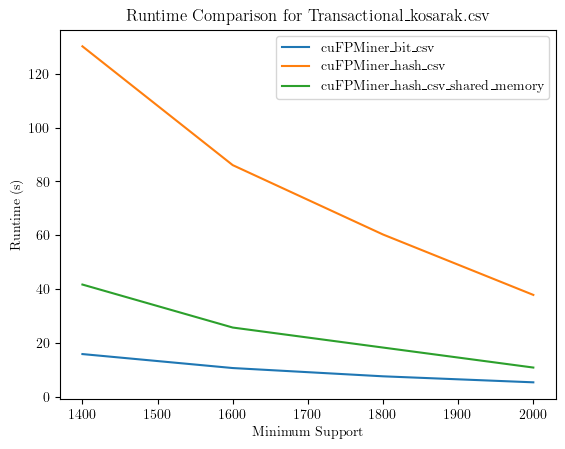

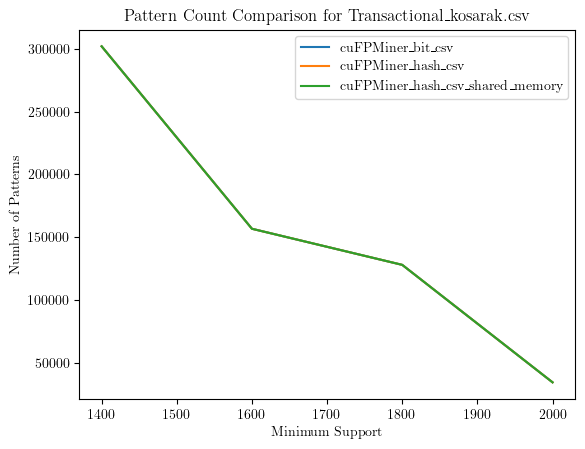

In [1]:
from algs.cuFPMiner_bit import cuFPMiner_bit
from algs.cuFPMiner_hash import cuFPMiner_hash
from algs.csv_to_parquet import csv_to_parquet
from matplotlib import pyplot as plt

# Configure matplotlib for LaTeX and transparent background
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'serif',
    'savefig.transparent': True
})

work = [
    ["/home/tarun/cuPAMI/datasets/Transactional_kosarak.csv", [2000,1800,1600,1400]],
]
sep = "\t"

for file, minSup in work:
    cuFPMiner_bit_parquet_runtime = []
    cuFPMiner_bit_csv_runtime = []
    
    cuFPMiner_hash_parquet_runtime = []
    cuFPMiner_hash_csv_runtime = [] 
    
    cuFPMiner_hash_csv_shared_memory_runtime = []
    cuFPMiner_hash_parquet_shared_memory_runtime = []
    
    cuFPMiner_bit_parquet_patterns = []
    cuFPMiner_bit_csv_patterns = []
    
    cuFPMiner_hash_parquet_patterns = []
    cuFPMiner_hash_csv_patterns = []
    
    cuFPMiner_hash_parquet_shared_memory_patterns = []
    cuFPMiner_hash_csv_shared_memory_patterns = []
    
    # Convert to parquet
    parquet_file = file.split("/")[-1].split(".")[0] + ".parquet"
    parquet_file = "/home/tarun/cuPAMI/datasets/" + parquet_file
    # csv_to_parquet(file, parquet_file, sep)

    for i in minSup:
        # miner = cuFPMiner_bit(parquet_file, i, sep, "parquet", 'managed')
        # miner.mine()
        # cuFPMiner_bit_parquet_runtime.append(miner.getRuntime())
        # cuFPMiner_bit_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_bit(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_bit_csv_runtime.append(miner.getRuntime())
        cuFPMiner_bit_csv_patterns.append(len(miner.getPatterns()))

        # miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed')
        # miner.mine()
        # cuFPMiner_hash_parquet_runtime.append(miner.getRuntime())
        # cuFPMiner_hash_parquet_patterns.append(len(miner.getPatterns()))

        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed')
        miner.mine()
        cuFPMiner_hash_csv_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_patterns.append(len(miner.getPatterns()))
        
        # miner = cuFPMiner_hash(parquet_file, i, sep, "parquet", 'managed', shared=True)
        # miner.mine()
        # cuFPMiner_hash_parquet_shared_memory_runtime.append(miner.getRuntime())
        # cuFPMiner_hash_parquet_shared_memory_patterns.append(len(miner.getPatterns()))
        
        miner = cuFPMiner_hash(file, i, sep, "csv", 'managed', shared=True)
        miner.mine()
        cuFPMiner_hash_csv_shared_memory_runtime.append(miner.getRuntime())
        cuFPMiner_hash_csv_shared_memory_patterns.append(len(miner.getPatterns()))
    
    # Plot runtime
    plt.figure()
    # plt.plot(minSup, cuFPMiner_bit_parquet_runtime)
    plt.plot(minSup, cuFPMiner_bit_csv_runtime)
    # plt.plot(minSup, cuFPMiner_hash_parquet_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_runtime)
    # plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_runtime)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_runtime)
    
    # plt.legend([
    #     'cuFPMiner\_bit\_parquet', 'cuFPMiner\_bit\_csv',
    #     'cuFPMiner\_hash\_parquet', 'cuFPMiner\_hash\_csv',
    #     'cuFPMiner\_hash\_parquet\_shared\_memory', 'cuFPMiner\_hash\_csv\_shared\_memory'
    # ])
    
    plt.legend([
        'cuFPMiner\_bit\_csv',
        'cuFPMiner\_hash\_csv',
        'cuFPMiner\_hash\_csv\_shared\_memory'
    ])
    
    plt.xlabel(r'Minimum Support')
    plt.ylabel(r'Runtime (s)')
    plt.title(rf'Runtime Comparison for {file.split("/")[-1]}')
    plt.savefig(f'{file.split("/")[-1]}_runtime.svg', format='svg', transparent=True)
    plt.show()
    
    # Plot patterns
    plt.figure()
    # plt.plot(minSup, cuFPMiner_bit_parquet_patterns)
    plt.plot(minSup, cuFPMiner_bit_csv_patterns)
    # plt.plot(minSup, cuFPMiner_hash_parquet_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_patterns)
    # plt.plot(minSup, cuFPMiner_hash_parquet_shared_memory_patterns)
    plt.plot(minSup, cuFPMiner_hash_csv_shared_memory_patterns)
    
    # plt.legend([
    #     r'cuFPMiner\_bit\_parquet', r'cuFPMiner\_bit\_csv',
    #     r'cuFPMiner\_hash\_parquet', r'cuFPMiner\_hash\_csv',
    #     r'cuFPMiner\_hash\_parquet\_shared\_memory', r'cuFPMiner\_hash\_csv\_shared\_memory'
    # ])
    plt.legend([
        'cuFPMiner\_bit\_csv',
        'cuFPMiner\_hash\_csv',
        'cuFPMiner\_hash\_csv\_shared\_memory'
    ])

    plt.xlabel(r'Minimum Support')
    plt.ylabel(r'Number of Patterns')
    plt.title(rf'Pattern Count Comparison for {file.split("/")[-1]}')
    plt.savefig(f'{file.split("/")[-1]}_patterns.svg', format='svg', transparent=True)
    plt.show()


In [3]:
file1 = "patterns.txt"
file2 = "/home/tarun/cuPAMI/algs/temp.txt"

file1_set = {}
file2_set = {}

with open(file1, 'r') as f:
    for line in f:
        # file1_set.add(line.strip())
        # split ":
        line = line.split(":")
        line[0] = line[0].split("\t")
        line[0] = sorted(line[0])
        line[0] = "\t".join(line[0])
        file1_set[line[0]] = int(line[1].strip())

with open(file2, 'r') as f:
    for line in f:
        # file2_set.add(line.strip())
        line = line.split(":")
        line[0] = line[0].split("\t")
        line[0] = sorted(line[0])
        line[0] = "\t".join(line[0])
        # file2_set.add(line[0] + ":" + line[1].strip())
        file2_set[line[0]] = int(line[1].strip())
        
        
# if same but diff count print
for k, v in file1_set.items():
    if k in file2_set:
        if v != file2_set[k]:
            print(k, "diff" , v, file2_set[k])
            
# if not in file2 print
for k, v in file1_set.items():
    if k not in file2_set:
        print(k, ":", v)
        
for k, v in file2_set.items():
    if k not in file1_set:
        print(k, ":", v)

487	614 diff 51 47
140	390 diff 66 61
140	390	722 diff 26 25
140	390	829 diff 22 20
140	217	390 diff 12 11
803	874 diff 38 35
579	809 diff 23 22
411	878 diff 21 18
805	932 diff 22 21
577	910 diff 18 17
1	183	283 diff 329 328
812	964 diff 13 11
236	71	736 diff 91 90
236	489	71	736 diff 86 85
326	774	950 diff 261 259
326	722	774	950 diff 252 250
326	526	774	950 diff 251 249
326	526	722	774	950 diff 243 241
326	403	774	950 diff 250 248
326	403	526	774	950 diff 242 240
326	403	722	774	950 diff 241 239
326	403	526	722	774	950 diff 234 232
154	294 diff 12 11
611	906 diff 18 17
500	906 diff 17 16
234	949 diff 14 12
147	634	738 diff 225 224
147	538	634	738 diff 216 215
147	634	738	78 diff 214 213
147	538	634	738	78 diff 206 205
147	634	738	829 diff 12 11
411	448	803 diff 11 10
504	574 diff 15 14
283	39	649 diff 245 243
145	283	39	649 diff 243 241
509	71	989 diff 358 357
354	509	71	989 diff 351 350
239	884	991 diff 44 43
239	48	884	991 diff 41 40
239	381	884	991 diff 39 38
239	381	48	884	991 di